In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [2]:

def importance_all(xgb_model):
    # 获取特征重要性
    feature_importance = xgb_model.feature_importances_

    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


    # 只保留前15个特征
    top_15_features = feature_importance_df.head(20)

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top 20 XGBoost Feature Importance')
    plt.show()



In [3]:
def testResult(xgb_model):
    # 预测训练集和测试集
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    # 计算均方根误差（RMSE）作为性能指标
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")


    # 计算训练集和测试集的R²值
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Train R²: {train_r2}")
    print(f"Test R²: {test_r2}")
    #print(f"params: { xgb_model.get_params()}")

    # 计算训练集和测试集的MAPE值
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    print(f"Train MAPE: {train_mape:.2f}%")
    print(f"Test MAPE: {test_mape:.2f}%")

In [4]:

def Categorized_feature_ACCImportance2(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典
    

    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 设置x轴范围从0开始，包含所有特征重要性的值
    plt.xlim(0, max(feature_importance_df['Importance']) * 1.1)

    # 在每个柱子的右侧标明重要性的数值
    for index, value in enumerate(feature_importance_df['Importance']):
        plt.text(value + 0.003, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    # 设置y轴刻度文本颜色为柱子的颜色
    for tick_label, color in zip(ax.get_yticklabels(), colors):
        tick_label.set_color(color)

    plt.show()
def Categorized_feature_relative_ACCImportance2(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典


    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 将特征重要性的值转换为百分比，并根据最大值来进行相对标尺
    max_importance = feature_importance_df['Importance'].max()
    feature_importance_df['Importance(%)'] = feature_importance_df['Importance'] / max_importance * 100

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance(%)', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Relative Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 在柱子右侧标明importance的数值，并设置y轴刻度的文本颜色为柱子的颜色
    for index, value in enumerate(feature_importance_df['Importance(%)']):
        plt.text(value, index, f'{value:.2f}%', ha='left', va='center')

    # 设置x轴刻度为0%, 25%, 75%, 100%
    plt.xticks([0, 25, 75, 100], ['0%', '25%', '75%', '100%'])

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

    # 设置y轴刻度文本颜色为柱子的颜色
    for tick_label, color in zip(ax.get_yticklabels(), colors):
        tick_label.set_color(color)

    plt.show()

In [5]:

def Categorized_feature_ACCImportance2(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典
    

    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 设置x轴范围从0开始，包含所有特征重要性的值
    plt.xlim(0, max(feature_importance_df['Importance']) * 1.1)

    # 在每个柱子的右侧标明重要性的数值
    for index, value in enumerate(feature_importance_df['Importance']):
        plt.text(value + 0.003, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    # 设置y轴刻度文本颜色为柱子的颜色
    for tick_label, color in zip(ax.get_yticklabels(), colors):
        tick_label.set_color(color)

    plt.show()
def Categorized_feature_relative_ACCImportance2(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典


    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 将特征重要性的值转换为百分比，并根据最大值来进行相对标尺
    max_importance = feature_importance_df['Importance'].max()
    feature_importance_df['Importance(%)'] = feature_importance_df['Importance'] / max_importance * 100

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance(%)', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 在柱子右侧标明importance的数值，并设置y轴刻度的文本颜色为柱子的颜色
    for index, value in enumerate(feature_importance_df['Importance(%)']):
        plt.text(value, index, f'{value:.2f}%', ha='left', va='center')

    # 设置x轴刻度为0%, 25%, 75%, 100%
    plt.xticks([0, 25, 75, 100], ['0%', '25%', '75%', '100%'])

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

    # 设置y轴刻度文本颜色为柱子的颜色
    for tick_label, color in zip(ax.get_yticklabels(), colors):
        tick_label.set_color(color)

    plt.show()

In [6]:
def pred_vs_true(xgb_model):
    y_test_pred = xgb_model.predict(X_test)

    # 绘制测试集的散点图，设置颜色为蓝色，大小为10
    plt.scatter(y_test.to_numpy(), y_test_pred, color='#358CEA', s=3, label='Test Data')

    # 绘制对角线，表示完美预测的线
    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            color='black', linestyle='--')

    plt.xlabel('Price')
    plt.ylabel('Predicted Price')
    plt.title('Scatter Plot Real vs Predicted.')
    plt.legend()
    plt.show()

In [7]:

def get_feature_type(feature):
    # 定义特征类别
    education_features = ['EducationAccess15m']
    health_features = ['HealthAccess15m']
    natural_features = ['Green parkAccess15m', 'Bodies of waterAccess15m']
    commercial_features = ['Manufacturing and productionAccess15m', 'ShoppingAccess15m']
    cultural_features = ['CultureAccess15m', 'TourismAccess15m']

    # 判断特征所属类别
    if feature in education_features:
        return 'education'
    elif feature in health_features:
        return 'health'
    elif feature in natural_features:
        return 'natural'
    elif feature in commercial_features:
        return 'commercial'
    elif feature in cultural_features:
        return 'cultural'
    else:
        return 'service'

type_colors = {
        'education': '#8D3BD6',   
        'health': '#0D71DD',          
        'natural': '#33BF80',         
        'commercial': '#FFC300',   
        'cultural': '#FF5733',       
        'service': '#F36CA6'           
    }

def Categorized_feature_ACCImportance(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典
    

    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 设置x轴范围从0开始，包含所有特征重要性的值
    plt.xlim(0, max(feature_importance_df['Importance']) * 1.1)

    # 在每个柱子的右侧标明重要性的数值
    for index, value in enumerate(feature_importance_df['Importance']):
        plt.text(value + 0.003, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

    plt.show()


#  让这些变量的柱子的数值为百分比
def Categorized_feature_relative_ACCImportance(xgb_model):
    feature_importance = xgb_model.feature_importances_
    # 将特征重要性和特征名称对应起来，并按重要性值降序排序
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # 筛选特征名以"15m"结尾的特征
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'].str.endswith('15m')]

    # 创建类型及其对应颜色的字典
   

    # 获取颜色列表
    colors = [type_colors[get_feature_type(feature)] for feature in feature_importance_df['Feature']]

    # 将特征重要性的值转换为百分比，并根据最大值来进行相对标尺
    max_importance = feature_importance_df['Importance'].max()
    feature_importance_df['Importance(%)'] = feature_importance_df['Importance'] / max_importance * 100

    # 绘制横向柱状图
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Importance(%)', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Feature')
    plt.title('Categorized XGBoost Feature Importance')

    # 添加图例
    for feature_type, color in type_colors.items():
        plt.bar(0, 0, color=color, label=feature_type, linewidth=0)
    plt.legend()

    # 在柱子右侧标明importance的数值
    for index, value in enumerate(feature_importance_df['Importance(%)']):
        plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10)

    # 设置x轴刻度为0%, 25%, 75%, 100%
    plt.xticks([0, 25, 75, 100], ['0%', '25%', '75%', '100%'])

    # 逆序排列柱状图，并让y轴从大到小排列
    ax.invert_yaxis()

    # 添加浅灰色的格纹横线和竖线
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
  
    plt.show()

Train RMSE: 666.6451814671486
Test RMSE: 2832.9492265204826
Train R²: 0.9853861370115242
Test R²: 0.7299974691913671

xgb_model = XGBRegressor(
    colsample_bytree= 0.7, 
    gamma= 0, 
    learning_rate=0.1, 
    min_child_weight=2, 
    n_estimators= 200, 
    reg_alpha= 1,
    reg_lambda=0.5, 
    subsample= 1.0
)

Train RMSE: 915.5741292746122
Test RMSE: 2811.0285376598654
Train R²: 0.972434709871529
Test R²: 0.734159734361981

xgb_model = XGBRegressor(
    colsample_bytree= 0.8, 
    gamma= 0, 
    learning_rate=0.1, 
    min_child_weight=1, 
    n_estimators= 200, 
    reg_alpha= 0,
    reg_lambda=0.1, 
    subsample= 1.0
)

Train RMSE: 860.686153056713
Test RMSE: 2766.4532322615164
Train R²: 0.9756406792189527
Test R²: 0.742523902217388

In [8]:

df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_distanceToCenter.csv")



df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    colsample_bytree= 0.8, 
    gamma= 0, 
    learning_rate=0.1, 
    min_child_weight=1, 
    n_estimators= 200, 
    reg_alpha= 0,
    reg_lambda=0.1, 
    subsample= 1.0
)


xgb_model.fit(X_train, y_train)
testResult(xgb_model)


Train RMSE: 860.686153056713
Test RMSE: 2766.4532322615164
Train R²: 0.9756406792189527
Test R²: 0.742523902217388
Train MAPE: 7.91%
Test MAPE: 17.71%


---

In [9]:
import numpy as np
import plotly.graph_objects as go

def plot_pd(model, dataset, feature_name):
    feature_values = np.linspace(dataset[feature_name].min(), dataset[feature_name].max(), 100)
    pd_values = []
    
    for value in feature_values:
        dataset_copy = dataset.copy()
        dataset_copy[feature_name] = value
        predictions = model.predict(dataset_copy)
        pd_values.append(predictions.mean())
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=feature_values, y=pd_values, mode='lines', name=feature_name))
    fig.update_layout(title=f"Partial Dependence of {feature_name}", xaxis_title=feature_name, yaxis_title="Prediction")
    fig.show()

# Use the function
plot_pd(xgb_model, X_test, 'Railway stationsAccess15m')


---

In [10]:
# Get the parameters of the model
params = xgb_model.get_params()

# Print the parameters
# for key, value in params.items():
#     print(f"{key}: {value}")


In [11]:
learning_rate = params['learning_rate']
n_estimators = params['n_estimators']
min_child_weight = params['min_child_weight']
subsample = params['subsample']
colsample_bytree = params['colsample_bytree']
reg_lambda = params['reg_lambda']
reg_alpha = params['reg_alpha']
gamma = params['gamma']

print(f"learning_rate: {learning_rate}")
print(f"n_estimators: {n_estimators}")
print(f"min_child_weight: {min_child_weight}")
print(f"subsample: {subsample}")
print(f"colsample_bytree: {colsample_bytree}")
print(f"reg_lambda: {reg_lambda}")
print(f"reg_alpha: {reg_alpha}")
print(f"gamma: {gamma}")


learning_rate: 0.1
n_estimators: 200
min_child_weight: 1
subsample: 1.0
colsample_bytree: 0.8
reg_lambda: 0.1
reg_alpha: 0
gamma: 0


调参数

In [12]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [ 0.1, 0.2],
#     'n_estimators': [200,300],
#     'min_child_weight': [1, 2],
#     'subsample': [ 1.0],
#     'colsample_bytree': [  0.7,0.8],
#     'reg_lambda': [0.1, 0.3,0.5],
#     'reg_alpha': [ 1.0, 0],
#     'gamma': [0, 0.1, 0.5]
# }

# # Create a base model
# xgb_model = XGBRegressor(random_state=42)

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# print(f"Best parameters: {best_params}")


In [13]:
testResult(xgb_model)

Train RMSE: 860.686153056713
Test RMSE: 2766.4532322615164
Train R²: 0.9756406792189527
Test R²: 0.742523902217388
Train MAPE: 7.91%
Test MAPE: 17.71%


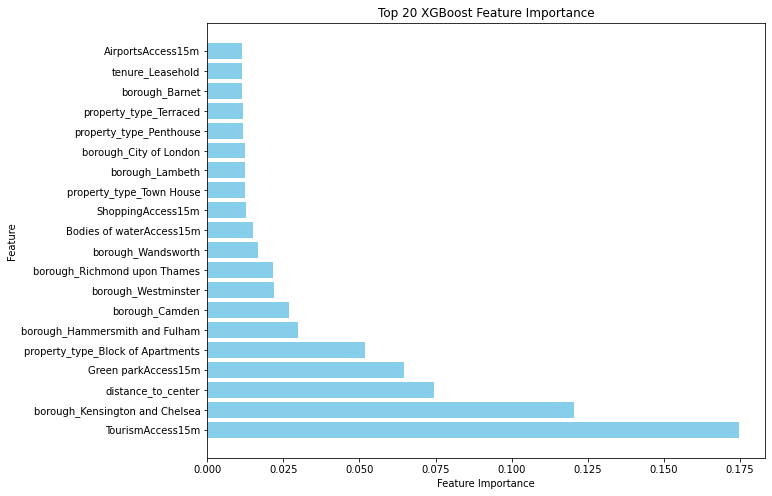

Train RMSE: 860.686153056713
Test RMSE: 2766.4532322615164
Train R²: 0.9756406792189527
Test R²: 0.742523902217388
Train MAPE: 7.91%
Test MAPE: 17.71%


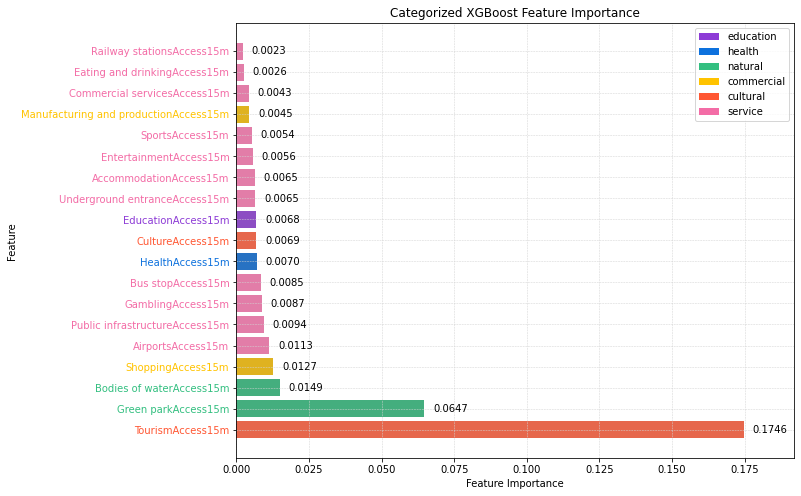

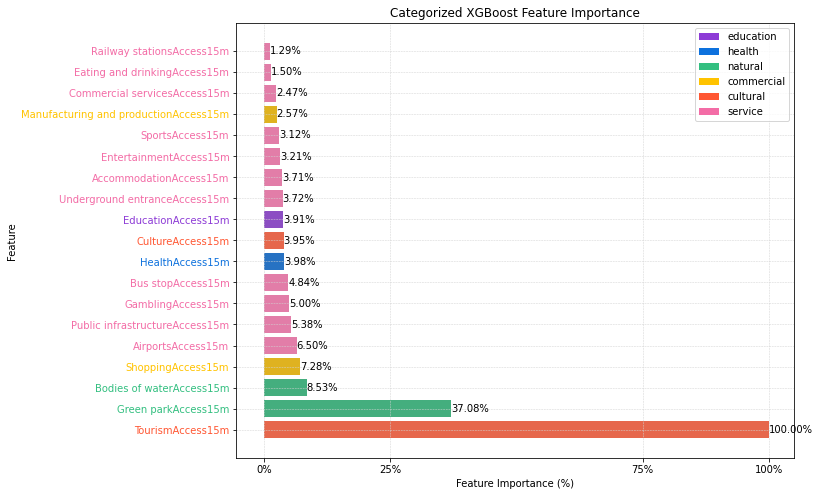

In [14]:
importance_all(xgb_model)
testResult(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)


---

log变化测试

In [15]:

# Load the data
df = pd.read_csv(r"D:\POI data\810_acc\reclass3_add_distanceTounderground.csv")

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

# Define independent variables (X) and dependent variable (y)
X = df_encoded.drop(['price', 'address', 'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = np.log(df_encoded['Price_per_square_meter'])  # Log transformation

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model with specified parameters
xgb_model = XGBRegressor(
    colsample_bytree= 0.8, 
    gamma= 0, 
    learning_rate=0.1, 
    min_child_weight=1, 
    n_estimators= 200, 
    reg_alpha= 0,
    reg_lambda=0.1, 
    subsample= 1.0
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Function to test the model's performance
def testResult_exp(model):
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Re-transform the predictions to the original scale
    original_scale_predictions = np.exp(predictions)
    
    # Re-transform the y_test to the original scale
    original_y_test = np.exp(y_test)
    
    # Calculate RMSE and R2
    rmse = np.sqrt(mean_squared_error(original_y_test, original_scale_predictions))
    r2 = r2_score(original_y_test, original_scale_predictions)
    
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")

# Evaluate the model's performance on the test set
testResult_exp(xgb_model)



RMSE: 2778.60363657346
R2: 0.7402572390519693


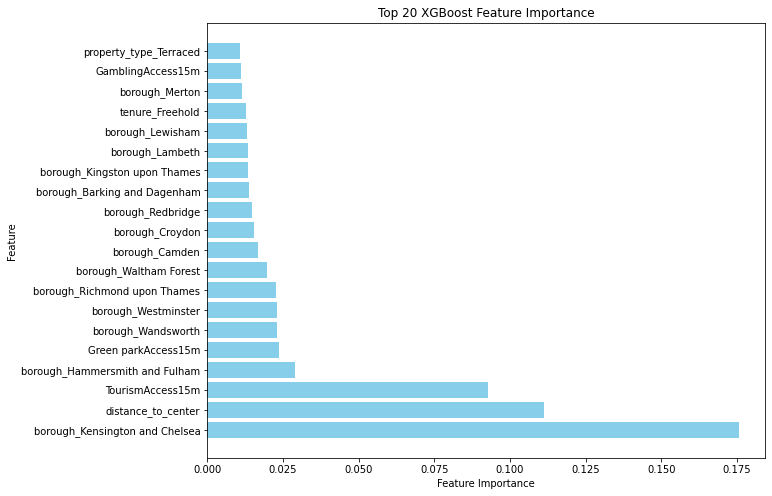

Train RMSE: 0.09491995172932781
Test RMSE: 0.22927411327207178
Train R²: 0.9608590672736179
Test R²: 0.7453381037446201
Train MAPE: 0.81%
Test MAPE: 1.91%


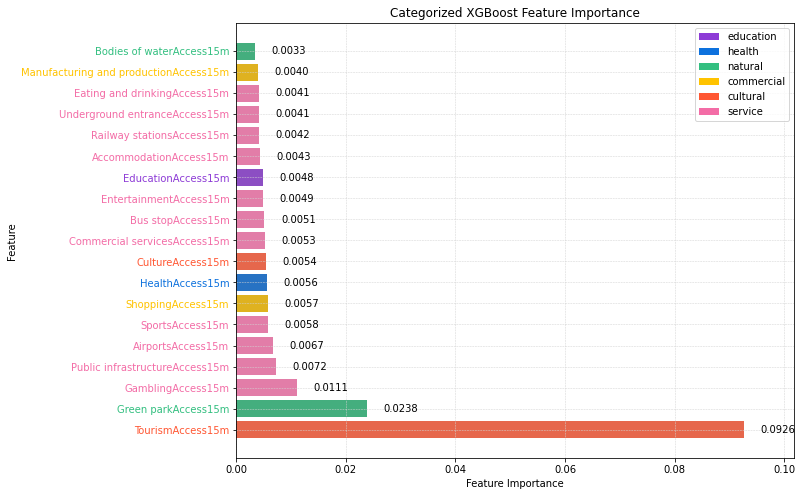

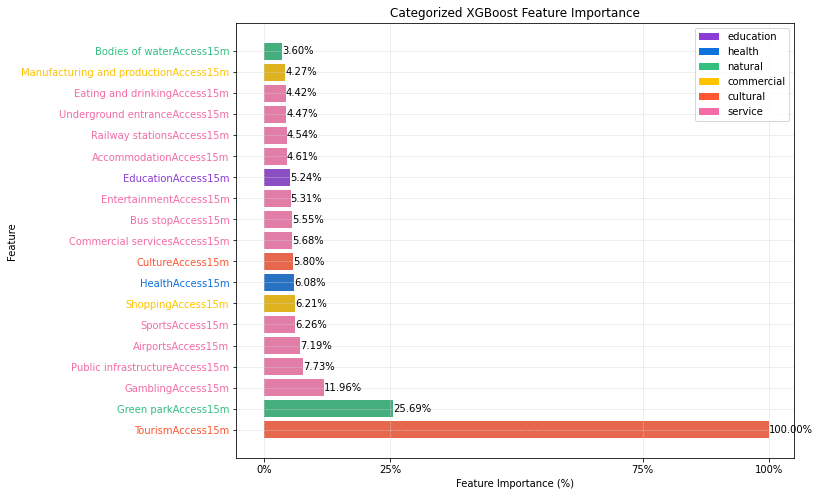

In [16]:
importance_all(xgb_model)
testResult(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)


不加log效果更好

In [17]:

df = pd.read_csv(r"D:\POI data\810_acc\reclass3_add_distanceTounderground.csv")

df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    colsample_bytree= 0.8, 
    gamma= 0, 
    learning_rate=0.1, 
    min_child_weight=1, 
    n_estimators= 200, 
    reg_alpha= 0,
    reg_lambda=0.1, 
    subsample= 1.0
)


xgb_model.fit(X_train, y_train)
testResult(xgb_model)


Train RMSE: 860.9278480431312
Test RMSE: 2708.906938553735
Train R²: 0.9756269962932034
Test R²: 0.7531242546220054
Train MAPE: 7.93%
Test MAPE: 18.10%


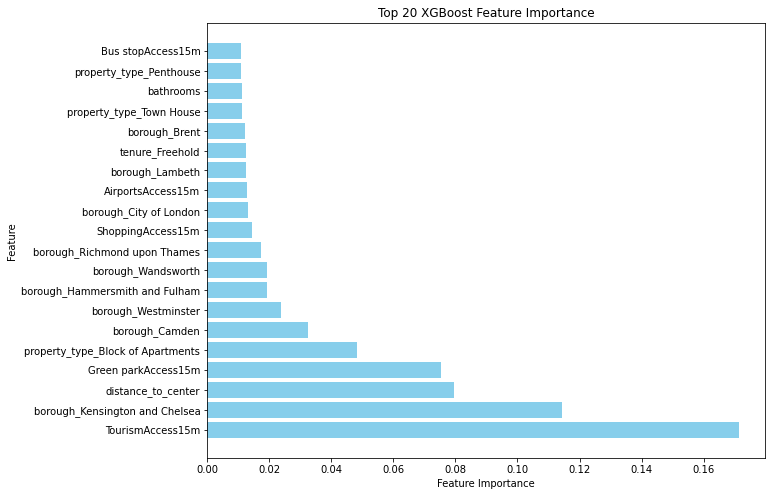

Train RMSE: 860.9278480431312
Test RMSE: 2708.906938553735
Train R²: 0.9756269962932034
Test R²: 0.7531242546220054
Train MAPE: 7.93%
Test MAPE: 18.10%


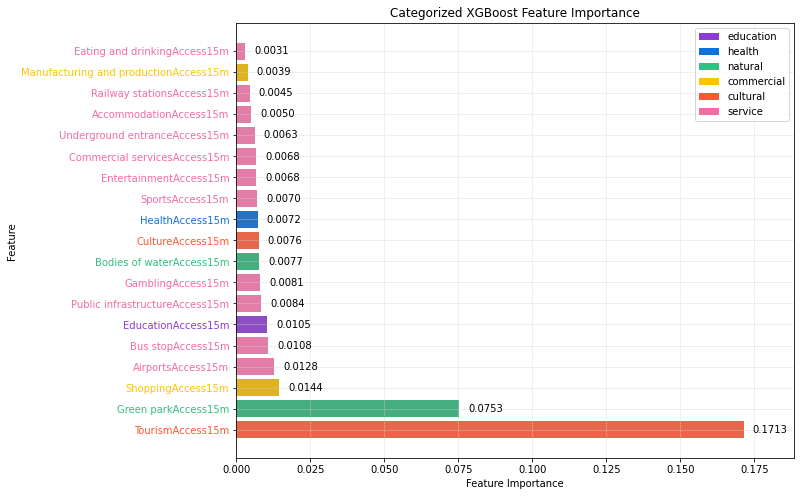

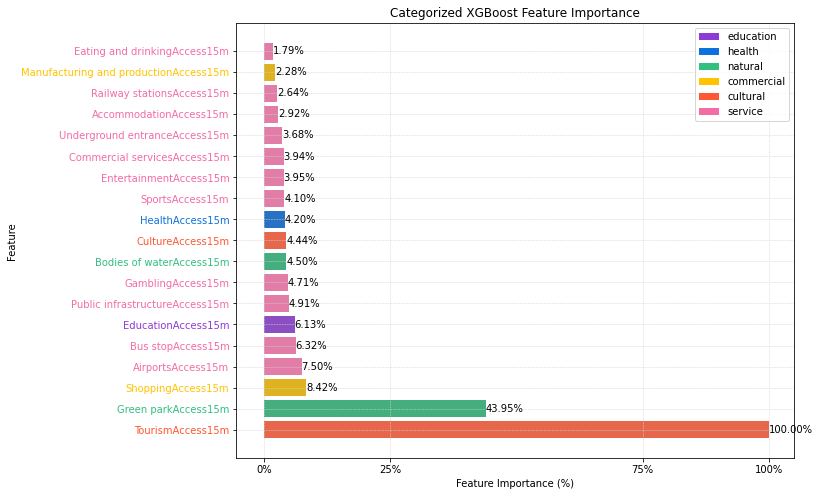

In [18]:
importance_all(xgb_model)
testResult(xgb_model)
Categorized_feature_ACCImportance2(xgb_model)
Categorized_feature_relative_ACCImportance2(xgb_model)